In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
device = torch.device('cuda') if (torch.cuda.is_available()) else torch.device('cpu')
device

device(type='cpu')

In [2]:
import pickle
# with open('temp2.pick', 'wb') as f:
#     pickle.dump(model, f)
    
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

with open('../models/expanded_sp_model.pick', 'rb') as f:
    model = CPU_Unpickler(f).load()

In [3]:
complete = pd.read_csv('../data/Full_SPacific2.csv')
# complete = pd.read_csv('/kaggle/input/spacific3/Full_SPacific2.csv')
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev3_ts5,prev3_ts6,prev3_ts7,prev3_ts8,prev3_dy,prev3_dx,ssh1,ssh2,bath1,bath2
0,10,0.0,1901058.0,337.0,2017.0,3.0,4.0,-49.5448,159.7474,-49.0256,...,-0.646798,0.461585,0.246950,-0.078740,-0.2956,-0.1431,0.053500,1.000000,0.277969,-1.000000
1,11,0.0,1901058.0,360.0,2017.0,10.0,20.0,-47.9904,163.5339,-47.4761,...,-0.364070,0.543888,0.226426,0.262563,-0.2163,-0.7417,-0.151312,1.000000,0.225017,-1.000000
2,12,0.0,1901058.0,361.0,2017.0,10.0,30.0,-47.4761,164.1107,-47.3438,...,-0.374211,0.566200,0.047431,0.412140,0.0083,-0.3137,-0.179385,-1.000000,-0.652355,-1.000000
3,13,0.0,1901058.0,362.0,2017.0,11.0,9.0,-47.3438,163.2821,-47.0608,...,-0.453763,0.278568,0.342156,0.049035,-0.1735,-0.2985,-0.835740,-1.000000,0.262931,-1.000000
4,14,0.0,1901058.0,363.0,2017.0,11.0,19.0,-47.0608,163.9069,-46.2846,...,-0.515990,0.227485,0.321838,0.073723,0.5143,0.5768,-0.477094,-1.000000,-0.314455,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,138220,10.0,3902389.0,134.0,2022.0,8.0,30.0,-20.1230,-109.7890,-20.0910,...,1.104784,0.609725,-0.550078,-0.118207,0.0450,0.0800,-0.551358,1.000000,-1.000000,0.129248
61135,138221,10.0,3902389.0,135.0,2022.0,9.0,9.0,-20.0910,-109.6610,-20.0180,...,1.169894,0.763656,-0.693145,0.005258,0.0200,0.0900,-0.028281,1.000000,-1.000000,0.230699
61136,138222,10.0,3902389.0,136.0,2022.0,9.0,19.0,-20.0180,-109.5840,-19.8910,...,1.127813,0.338755,-0.503737,-0.133409,-0.0070,0.1280,-0.086688,1.000000,-1.000000,0.266634
61137,138223,10.0,3902389.0,154.0,2023.0,3.0,17.0,-20.2200,-108.6730,-20.0560,...,1.310212,0.852507,-0.832035,0.113673,-0.3030,-0.0640,1.000000,-0.146425,-1.000000,0.132655


In [4]:
data = complete
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5184268981674282, 0.3533978379519491)

In [5]:
data = complete
data = data.assign(total_disp=np.sqrt(dx**2 + dy**2))
data = data[data.get('total_disp') < 1]
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.5143756652284844, 0.5170038751989349)

In [8]:
chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8',
  'prev_ts1', 'prev_ts2', 'prev_ts3', 'prev_ts4', 'prev_ts5', 'prev_ts6',
  'prev_ts7', 'prev_ts8','prev2_ts1', 'prev2_ts2', 'prev2_ts3', 'prev2_ts4', 'prev2_ts5', 'prev2_ts6',
  'prev2_ts7', 'prev2_ts8','prev3_ts1', 'prev3_ts2', 'prev3_ts3', 'prev3_ts4', 'prev3_ts5', 'prev3_ts6',
  'prev3_ts7', 'prev3_ts8', 'bath1', 'bath2', 'ssh1', 'ssh2', 'prev_dy', 'prev_dx', 'prev2_dy', 'prev2_dx',
                 'prev3_dy', 'prev3_dx', 'dy', 'dx']
final = data[chosen_params].dropna()
final

,ts1,ts2,ts3,ts4,ts5,ts6,ts7,ts8,prev_ts1,prev_ts2,...,ssh1,ssh2,prev_dy,prev_dx,prev2_dy,prev2_dx,prev3_dy,prev3_dx,dy,dx
0,-0.886030,-4.008245,1.415758,-3.626434,-0.483417,0.410115,0.207405,0.190843,-0.964131,-3.973977,...,0.053500,1.000000,-0.10180,1.190600,-0.161300,0.419900,-0.29560,-0.143100,0.519200,0.770100
1,-1.050118,-3.944305,1.283954,-3.187903,-0.515990,0.227485,0.321838,0.073723,-1.710814,-3.835883,...,-0.151312,1.000000,-0.17350,-0.298500,0.008300,-0.313700,-0.21630,-0.741700,0.514300,0.576800
2,-1.509834,-4.008495,1.141119,-3.548384,-0.502670,0.273014,0.107403,0.154691,-1.050118,-3.944305,...,-0.179385,-1.000000,0.51430,0.576800,-0.173500,-0.298500,0.00830,-0.313700,0.132300,-0.828600
3,-1.375141,-4.001887,1.586139,-3.495613,-0.549356,0.542551,0.253668,0.204975,-1.509834,-4.008495,...,-0.835740,-1.000000,0.13230,-0.828600,0.514300,0.576800,-0.17350,-0.298500,0.283000,0.624800
5,-1.113294,-4.113236,0.597526,-3.451509,-0.707933,-0.047359,0.213467,0.174404,-1.109493,-4.068647,...,0.132321,-1.000000,-0.03925,0.065555,-0.127028,0.097037,-0.51136,0.135757,-0.427977,0.801765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61134,-0.103917,-4.516683,0.146737,1.949804,1.231033,0.700594,-0.679503,-0.065859,0.116208,-4.428133,...,-0.551358,1.000000,-0.00700,0.128000,0.020000,0.090000,0.04500,0.080000,0.032000,0.128000
61135,-0.704889,-4.651527,-0.076126,2.052576,1.312617,0.767989,-0.819506,0.113578,-0.103917,-4.516683,...,-0.028281,1.000000,0.03200,0.128000,-0.007000,0.128000,0.02000,0.090000,0.073000,0.077000
61136,-0.826809,-4.662544,-0.207767,2.174357,1.289403,0.986241,-0.897816,0.204583,-0.704889,-4.651527,...,-0.086688,1.000000,0.07300,0.077000,0.032000,0.128000,-0.00700,0.128000,0.127000,0.020000
61137,-1.732734,-4.114318,-0.374978,1.175744,0.854125,-0.351473,0.190947,-0.836292,0.539132,-4.214100,...,1.000000,-0.146425,-0.25200,0.315000,-0.387000,-0.022000,-0.30300,-0.064000,0.164000,0.410000


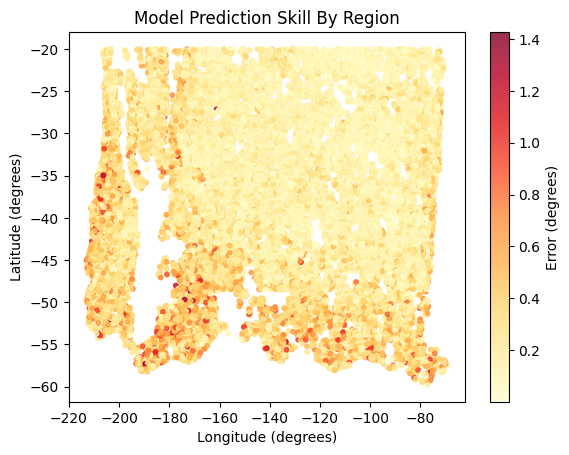

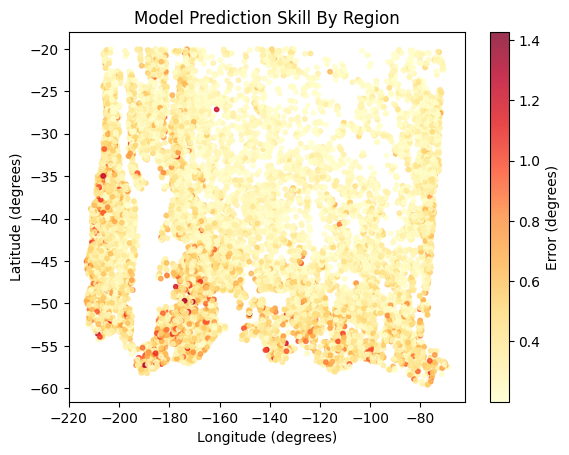

0.2684011958997722

In [9]:
Y2 = final[['dy', 'dx']].to_numpy()
X2 = final.drop(columns=['dy', 'dx']).to_numpy()
X2 = torch.tensor(X2).float().to(device)
Y2 = torch.tensor(Y2).float()
preds = model(X2).cpu()
lat_errs = np.abs(preds.detach()[:, 0] - Y2.detach()[:, 0])
lon_errs = np.abs(preds.detach()[:, 1] - Y2.detach()[:, 1])
total_err = np.sqrt(lat_errs**2 + lon_errs**2)
total_err
lons = data.get('lon')
lons = [x if x < 0 else x-360 for x in lons]
lats = data.get('lat')
plt.scatter(lons, lats, c=total_err, s=10, cmap='YlOrRd', alpha=.8)
plt.title('Model Prediction Skill By Region')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.colorbar(label='Error (degrees)')
plt.show()

idc = np.array(total_err > .2).tolist()

lons2 = np.array(lons)
lons2 = lons2[idc]
lats2 = np.array(lats)
lats2 = lats2[idc]
total_err2 = total_err[idc]

plt.scatter(lons2, lats2, c=total_err2, s=10, cmap='YlOrRd', alpha=.8)
plt.title('Model Prediction Skill By Region')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.colorbar(label='Error (degrees)')
plt.show()
len(lons2) / len(lons)

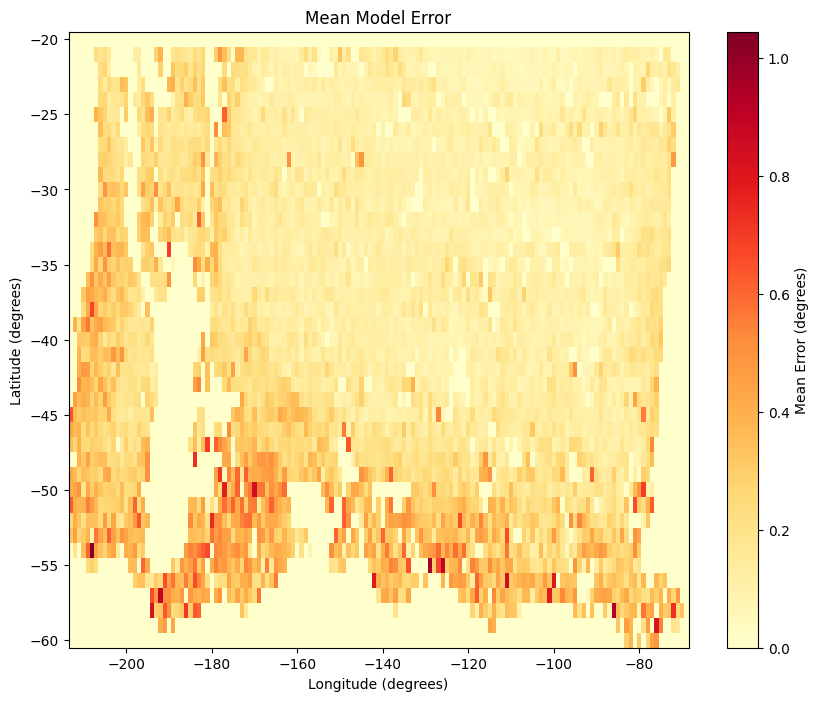

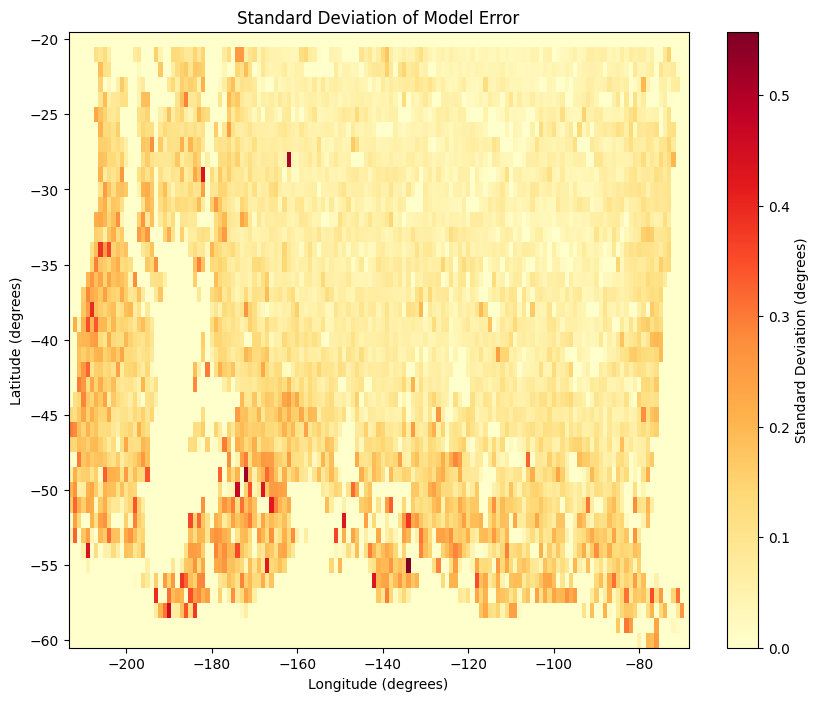

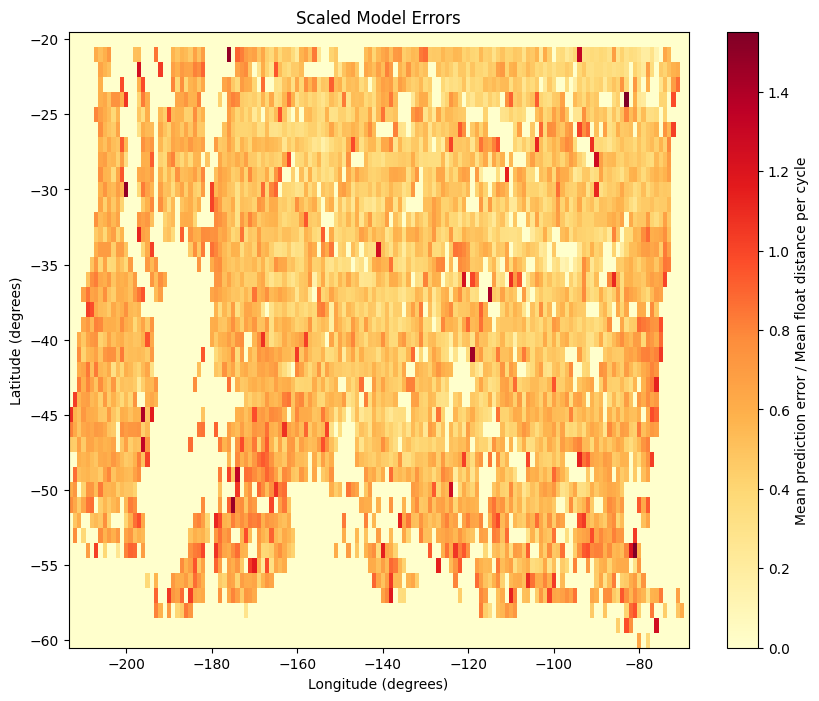

In [11]:
from matplotlib.colors import Normalize

# Define the bin edges
lon_bins = np.arange(np.floor(min(lons)), np.ceil(max(lons)) + 1, 1)
lat_bins = np.arange(np.floor(min(lats)), np.ceil(max(lats)) + 1, 1)

# Digitize the data to find which bin each point belongs to
lon_bin_indices = np.digitize(lons, lon_bins) - 1
lat_bin_indices = np.digitize(lats, lat_bins) - 1

# Calculate the mean error in each bin
mean_errors = np.zeros((len(lon_bins) - 1, len(lat_bins) - 1))
error_stdev = np.zeros((len(lon_bins) - 1, len(lat_bins) - 1))
nsr = np.zeros((len(lon_bins) - 1, len(lat_bins) - 1))
counts = np.zeros((len(lon_bins) - 1, len(lat_bins) - 1))

for lon_idx, lat_idx, error in zip(lon_bin_indices, lat_bin_indices, total_err):
    if lon_idx >= 0 and lon_idx < len(mean_errors) and lat_idx >= 0 and lat_idx < len(mean_errors[0]):
        mean_errors[lon_idx, lat_idx] += error
        counts[lon_idx, lat_idx] += 1       

# Avoid division by zero by handling empty bins
mean_errors[counts > 0] /= counts[counts > 0]

for lon_idx, lat_idx, error in zip(lon_bin_indices, lat_bin_indices, total_err):
    if lon_idx >= 0 and lon_idx < len(mean_errors) and lat_idx >= 0 and lat_idx < len(mean_errors[0]):
        error_stdev[lon_idx, lat_idx] += (error - mean_errors[lon_idx, lat_idx])**2

error_stdev[counts > 0] /= counts[counts > 0]
error_stdev = np.sqrt(error_stdev)

displacement_norm = data.get('total_disp').to_numpy()
for lon_idx, lat_idx, norm in zip(lon_bin_indices, lat_bin_indices, displacement_norm):
    if lon_idx >= 0 and lon_idx < len(mean_errors) and lat_idx >= 0 and lat_idx < len(mean_errors[0]):
        nsr[lon_idx, lat_idx] += norm

nsr[counts > 0] /= counts[counts > 0]
nsr[counts > 0] = mean_errors[counts > 0] / nsr[counts > 0]
nsr[counts < 3] = 0

# Create the meshgrid for plotting
lon_edges, lat_edges = np.meshgrid(lon_bins, lat_bins, indexing='ij')
lon_centers = (lon_edges[:-1, :-1] + lon_edges[1:, 1:]) / 2
lat_centers = (lat_edges[:-1, :-1] + lat_edges[1:, 1:]) / 2

# Create plots
plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_edges, lat_edges, np.vstack([np.hstack([mean_errors, np.zeros((mean_errors.shape[0], 1))]), np.zeros((1, mean_errors.shape[1] + 1))]), cmap='YlOrRd', norm=Normalize(vmin=mean_errors.min(), vmax=mean_errors.max()), shading='auto')
plt.colorbar(label='Mean Error (degrees)')
plt.title('Mean Model Error')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

# Stdev
plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_edges, lat_edges, np.vstack([np.hstack([error_stdev, np.zeros((error_stdev.shape[0], 1))]), np.zeros((1, error_stdev.shape[1] + 1))]), cmap='YlOrRd', norm=Normalize(vmin=error_stdev.min(), vmax=error_stdev.max()), shading='auto')
plt.colorbar(label='Standard Deviation (degrees)')
plt.title('Standard Deviation of Model Error')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

snr_min = nsr.min()
snr_max = nsr.max()
# Signal to noise ratio
plt.figure(figsize=(10, 8))
plt.pcolormesh(lon_edges, lat_edges, np.vstack([np.hstack([nsr, np.zeros((nsr.shape[0], 1))]), np.zeros((1, nsr.shape[1] + 1))]), cmap='YlOrRd', norm=Normalize(vmin=snr_min, vmax=snr_max), shading='auto')
plt.colorbar(label='Mean prediction error / Mean float distance per cycle')
plt.title('Scaled Model Errors')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()

[0.1603476, 0.16203494, 0.1666855, 0.17045277]


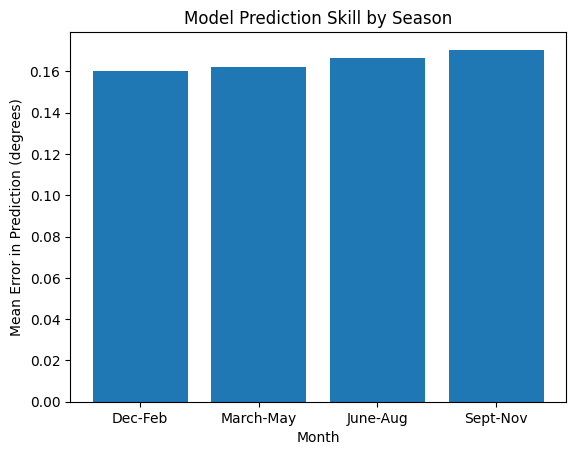

In [12]:
data = data.assign(errs=total_err)
dec_feb = data[(data.get('month') == 12) | (data.get('month') <= 2)]
march_may = data[(data.get('month') >= 3) & (data.get('month') <= 5)]
june_aug = data[(data.get('month') >= 6) & (data.get('month') <= 8)]
sept_nov = data[(data.get('month') >= 9) & (data.get('month') <= 11)]
by_season = [(np.mean(dec_feb.get('errs'))), np.mean(march_may.get('errs')), np.mean(june_aug.get('errs')), np.mean(sept_nov.get('errs'))]
print(by_season)
plt.bar(['Dec-Feb', 'March-May', 'June-Aug', 'Sept-Nov'], by_season)
plt.ylabel('Mean Error in Prediction (degrees)')
plt.xlabel('Month')
plt.title('Model Prediction Skill by Season')
plt.show()